In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [10, 8]

/var/folders/hq/_fz6hh5d28d0vdjc51x9tw2w0000gn/T/ipykernel_21459/3289929700.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, times, conv_angles, p0=start)


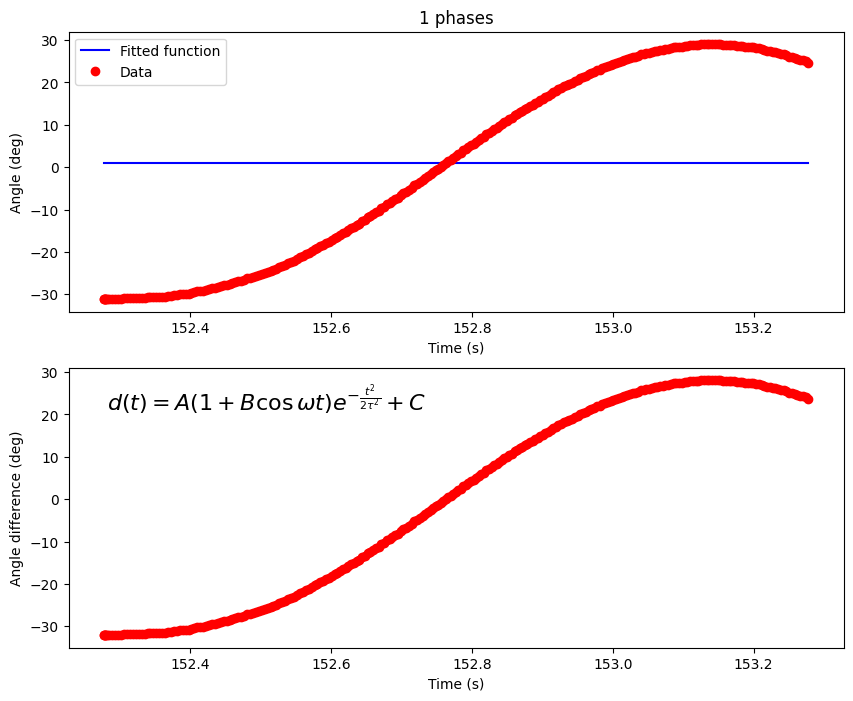

Start A =	 -30.0 		, Final A =	 -30.0  +/-  inf
Start B =	 60.0 		, Final B =	 60.0  +/-  inf
Start C =	 -30.0 		, Final C =	 0.9276425014507694  +/-  inf
Start omega =	 4.0 		, Final omega =	 4.0  +/-  inf
Start tau =	 1.0 		, Final tau =	 1.0  +/-  inf

 chisq = 134812.39760543534 	 df = 255 		 reduced chisq =  528.6760690409229


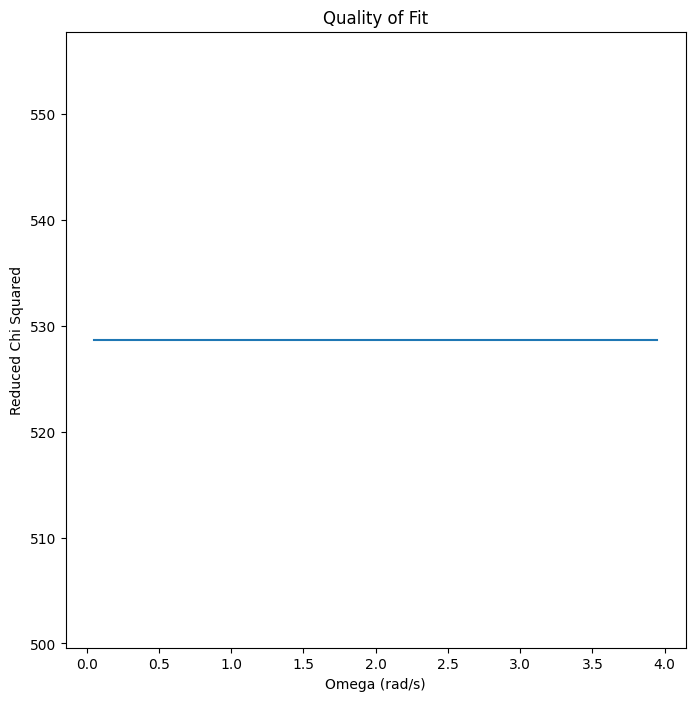

In [21]:
# Define the fitting function
def fit_func(t, a, b, c, omega, tau):
    return a * (1 + b * np.cos(omega * t)) * np.exp(-t**2.0 / (2.0 * tau**2.0)) + c

def riley_the_goat_fr(data, num):
    times = data[:,0]
    angles = data[:,1]

    conv_factor = 1 / 5.56
    conv_angles = angles * conv_factor

    # Starting parameter values: a, b, c, omega, tau
    start = np.array([-30.0, 60.0, -30.0, 4., 1.0])

    # Perform the fit
    popt, pcov = curve_fit(fit_func, times, conv_angles, p0=start)

    # Generate fitted data
    fitted_angles = fit_func(times, *popt)

    # Plot the data and the fit
    plt.figure(figsize=(10, 8))
    ax1 = plt.subplot(211)
    plt.errorbar(times, conv_angles, fmt='ro', label='Data')  # Data points as dots
    x = np.linspace(min(times), max(times), 1000)  # Create the x values for the fit
    plt.plot(x, fit_func(x, *popt), 'b-', label='Fitted function')  # Fitted function as line
    plt.title(f'{num} phases')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (deg)')
    plt.legend()

    # Plot the residuals
    ax2 = plt.subplot(212)
    plt.errorbar(times, conv_angles - fit_func(times, *popt), fmt='ro')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle difference (deg)')

    # Show the equation
    text = r'$d(t) = A(1 + B \cos \omega t) e^{-\frac{t^2}{2 \tau^2}} + C$'
    ax = plt.gca()
    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=16, verticalalignment='top')

    plt.show()

    # Print out the coefficients and the 1-sigma uncertainty on the coefficients
    coefficient_err = np.sqrt(np.diag(pcov))
    coefficients = popt
    print("Start A =\t", start[0], "\t\t, Final A =\t", coefficients[0], " +/- ", coefficient_err[0])
    print("Start B =\t", start[1], "\t\t, Final B =\t", coefficients[1], " +/- ", coefficient_err[1])
    print("Start C =\t", start[2], "\t\t, Final C =\t", coefficients[2], " +/- ", coefficient_err[2])
    print("Start omega =\t", start[3], "\t\t, Final omega =\t", coefficients[3], " +/- ", coefficient_err[3])
    print("Start tau =\t", start[4], "\t\t, Final tau =\t", coefficients[4], " +/- ", coefficient_err[4])

    # Calculate the Chi-squared goodness of fit statistic, and the reduced chi squared statistic
    fitted = fit_func(times, *popt)
    residuals = conv_angles - fitted
    chisq = np.sum((residuals)**2)
    degree_freedom = len(times) - len(popt)
    print("\n chisq =", chisq, "\t df =", degree_freedom, "\t\t reduced chisq = ", chisq / degree_freedom)

    # Take the previously fit parameters but vary the frequency omega
    best = popt
    omega_range = np.linspace(.05, 3.95, num=179)

    # Loop over the omega_range values
    chi_range = []

    for om in omega_range:
        popt[3] = om
        fitted = fit_func(times, *popt)
        residuals = conv_angles - fitted  # Calculate the residuals for best fit with varying omega
        chisq = np.sum((residuals)**2)  # Calculate Chi squared for that fit
        chi_range.append(chisq / degree_freedom)  # Build an array of the reduced Chi squared for each omega

    # Plot the reduced chi squared vs. omega
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title('Quality of Fit')
    ax.set_ylabel('Reduced Chi Squared')
    ax.set_xlabel('Omega (rad/s)')
    ax.plot(omega_range, chi_range)
    plt.show()

# Example usage
# Assuming d_1 is your data array
d_1 = np.genfromtxt('collect_time_1.csv', delimiter=',')
riley_the_goat_fr(d_1, 1)

In [ ]:
# One period
d_1 = np.genfromtxt('collect_time_1.csv', delimiter=',')
riley_the_goat_fr(d_1, 1)

In [ ]:
# Five periods
d_5 = np.genfromtxt('collect_time_5.csv', delimiter=',')
riley_the_goat_fr(d_5, 5)

In [ ]:
# Ten periods
d_10 = np.genfromtxt('collect_time_10.csv', delimiter=',')
riley_the_goat_fr(d_10, 10)

In [ ]:
# Twenty periods
d_20 = np.genfromtxt('collect_time_20.csv', delimiter=',')
riley_the_goat_fr(d_20, 20)

In [ ]:
# Forty periods
d_40 = np.genfromtxt('collect_time_40.csv', delimiter=',')
riley_the_goat_fr(d_40, 40)